<a href="https://colab.research.google.com/github/gautam-pai/Brain-Tumor-Classification/blob/main/Model%20%26%20Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_dir='/content/drive/MyDrive/Dataset/Training'

In [3]:
data_dir

'/content/drive/MyDrive/Dataset/Training'

## Import Libraries

In [4]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from torchvision import transforms,datasets

In [6]:
from torch.utils.data import DataLoader

In [7]:
from torchvision.io import read_image

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
import os

dataset_path = "/content/drive/MyDrive/Dataset/Training"  # Adjust if necessary

if os.path.exists(dataset_path):
    print("✅ Directory exists!")
    print("Contents:", os.listdir(dataset_path))  # List its contents
else:
    print("❌ Directory does NOT exist. Check the path!")


✅ Directory exists!
Contents: ['pituitary_tumor', 'meningioma_tumor', 'no_tumor', 'glioma_tumor']


## Load the image folders to dataset

In [10]:
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [11]:
transform = transforms.Compose([
    transforms.Resize((512)),
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [12]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [13]:
dataset

Dataset ImageFolder
    Number of datapoints: 2870
    Root location: /content/drive/MyDrive/Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=512, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(512, 512))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [14]:
test_dataset=datasets.ImageFolder(root='/content/drive/MyDrive/Dataset/Testing', transform=transform)
test_dataset

Dataset ImageFolder
    Number of datapoints: 394
    Root location: /content/drive/MyDrive/Dataset/Testing
    StandardTransform
Transform: Compose(
               Resize(size=512, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(512, 512))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

## Visualize the image

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Gliomma Tumor')

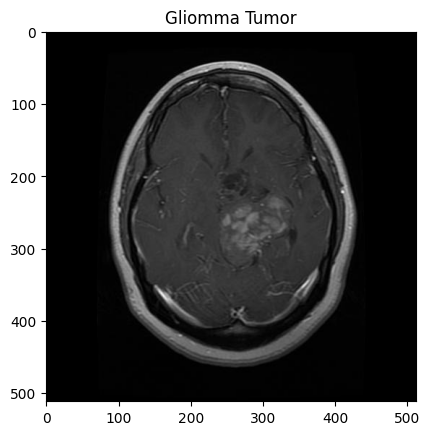

In [15]:

print(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').permute(1,2,0))
plt.title("Gliomma Tumor")

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Meningioma Tumor')

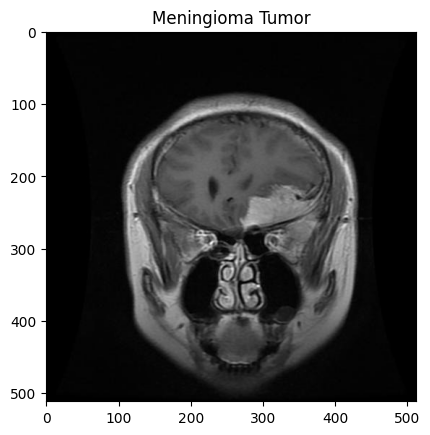

In [16]:
print(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').permute(1,2,0))
plt.title("Meningioma Tumor")

torch.Size([3, 350, 350])


Text(0.5, 1.0, 'No Tumor')

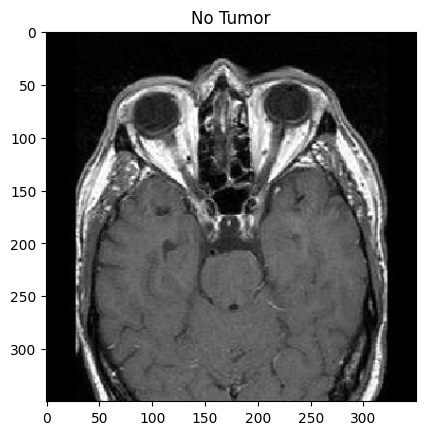

In [17]:
print(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').permute(1,2,0))
plt.title("No Tumor")

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Pituitary Tumor')

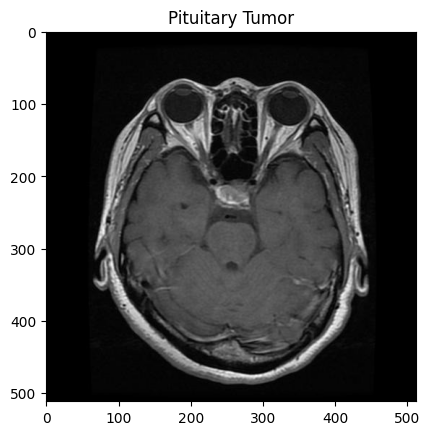

In [18]:
print(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').permute(1,2,0))
plt.title("Pituitary Tumor")

Text(0.5, 1.0, 'Pituitary Tumor')

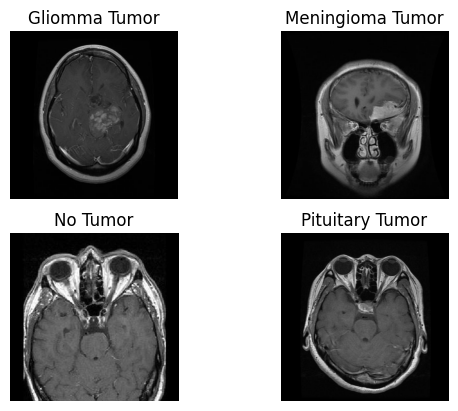

In [19]:
plt.subplot(2,2,1)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Gliomma Tumor")

plt.subplot(2,2,2)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Meningioma Tumor")

plt.subplot(2,2,3)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').permute(1,2,0))
plt.axis('off')
plt.title("No Tumor")

plt.subplot(2,2,4)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Pituitary Tumor")

## Passing the Dataset to DataLoader


In [20]:
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=4,pin_memory=True)
test_dataloader=DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=4,pin_memory=True)

In [21]:
# Get one batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Print batch shape
print("Image batch shape:", images.shape)  # Expected: (batch_size, channels, height, width)
print("Label batch shape:", labels.shape)  # Expected: (batch_size,)
print("Classes:", dataset.classes)  # Class names


Image batch shape: torch.Size([1, 3, 512, 512])
Label batch shape: torch.Size([1])
Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


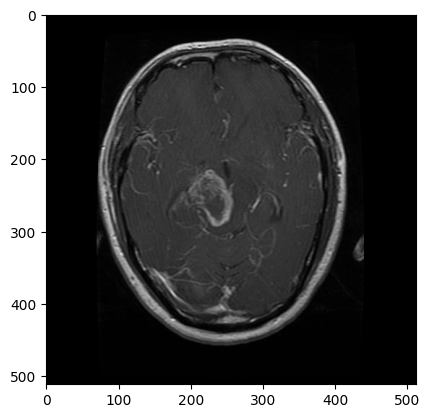

Label: glioma_tumor


In [22]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show first image in the batch
imshow(images[0])
print("Label:", dataset.classes[labels[0].item()])

In [23]:
images.shape

torch.Size([1, 3, 512, 512])

## Defining the CNN Model


Image size is 3x512x512

In [24]:
class CNN_Model(nn.Module):

  def __init__(self):
    super().__init__()
      #Convolution Filter
    self.conv1=nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=4)
    self.conv2=nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1)
    self.conv3=nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1)
    self.conv4=nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1)
    self.conv5=nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1)
    # Max Pooling Filter
    self.maxpool1=nn.MaxPool2d(kernel_size=3,stride=2)

    #Fully Connected Layer -
    self.fc1=nn.Linear(in_features=10*10*256,out_features=9216)
    self.fc2=nn.Linear(in_features=9216,out_features=4096)
    self.fc3=nn.Linear(in_features=4096,out_features=4096)
    self.fc4=nn.Linear(in_features=4096,out_features=1000)
    self.fc5=nn.Linear(in_features=1000,out_features=4)


  def forward(self,X):
    # Conv & Max Pool
    X=F.relu(self.conv1(X))
    X=self.maxpool1(X)
    # Conv & Max Pool
    X=F.relu(self.conv2(X))
    X=self.maxpool1(X)
    # 2 Conv Filter followed by Max Pooll
    X=F.relu(self.conv3(X))
    X=F.relu(self.conv4(X))
    X=F.relu(self.conv5(X))
    X=self.maxpool1(X)

    # Flatten
    X=X.view(-1,10*10*256)

    # Fully Connected Layer
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=F.relu(self.fc3(X))
    X=F.relu(self.fc4(X))
    X=self.fc5(X)

    return F.log_softmax(X,dim=1)

In [25]:
model=CNN_Model()
model = model.to(device)

In [26]:
# Loss and Optimizer instantiation
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

# Training Model

# **Adam Optimizer**

## Batch Size = 1

In [27]:
import time
start_time=time.time()

epochs=20
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)
    b+=1
    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses.append(loss)
  train_correct.append(trn_corr)
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.2045466899871826
Epoch: 2  Loss:1.238385558128357
Epoch: 3  Loss:1.195621132850647
Epoch: 4  Loss:1.2749851942062378
Epoch: 5  Loss:1.2789560556411743
Epoch: 6  Loss:1.1907739639282227
Epoch: 7  Loss:1.3564867973327637
Epoch: 8  Loss:1.3921157121658325
Epoch: 9  Loss:1.2213133573532104
Epoch: 10  Loss:1.2636724710464478
Epoch: 11  Loss:1.211136817932129
Epoch: 12  Loss:1.25063157081604
Epoch: 13  Loss:1.2340116500854492
Epoch: 14  Loss:1.2059334516525269
Epoch: 15  Loss:1.1651164293289185
Epoch: 16  Loss:1.907605528831482
Epoch: 17  Loss:1.1385759115219116
Epoch: 18  Loss:1.1729642152786255
Epoch: 19  Loss:1.2425286769866943
Epoch: 20  Loss:1.3738682270050049
Total time taken to finish the training =22.24mins


## Batch Size = 32

In [28]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)


In [29]:
import time
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_32=[]
test_losses_32=[]
train_correct_32=[]
test_correct_32=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_32.append(loss)
  train_correct_32.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_32.append(loss)
  test_correct_32.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.385515570640564
Epoch: 2  Loss:1.385534405708313
Epoch: 3  Loss:1.3853057622909546
Epoch: 4  Loss:1.385736107826233
Epoch: 5  Loss:1.3857718706130981
Epoch: 6  Loss:1.383589506149292
Epoch: 7  Loss:1.3866652250289917
Epoch: 8  Loss:1.3849643468856812
Epoch: 9  Loss:1.3857189416885376
Epoch: 10  Loss:1.3855056762695312
Epoch: 11  Loss:1.3857985734939575
Epoch: 12  Loss:1.3850510120391846
Epoch: 13  Loss:1.3862649202346802
Epoch: 14  Loss:1.3850401639938354
Epoch: 15  Loss:1.3869365453720093
Epoch: 16  Loss:1.385023832321167
Epoch: 17  Loss:1.386131763458252
Epoch: 18  Loss:1.3850089311599731
Epoch: 19  Loss:1.3862768411636353
Epoch: 20  Loss:1.3857611417770386
Total time taken to finish the training =6.93mins


## Batch Size = 64

In [30]:
train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2,pin_memory=True)

In [31]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_64=[]
test_losses_64=[]
train_correct_64=[]
test_correct_64=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_64.append(loss)
  train_correct_64.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_64.append(loss)
  test_correct_64.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.388466715812683
Epoch: 2  Loss:1.387308955192566
Epoch: 3  Loss:1.3895896673202515
Epoch: 4  Loss:1.3890645503997803
Epoch: 5  Loss:1.388547420501709
Epoch: 6  Loss:1.3864270448684692
Epoch: 7  Loss:1.3871134519577026
Epoch: 8  Loss:1.388263463973999
Epoch: 9  Loss:1.389719843864441
Epoch: 10  Loss:1.3815009593963623
Epoch: 11  Loss:1.3856847286224365
Epoch: 12  Loss:1.3899880647659302
Epoch: 13  Loss:1.3871289491653442
Epoch: 14  Loss:1.3846287727355957
Epoch: 15  Loss:1.3841824531555176
Epoch: 16  Loss:1.390238881111145
Epoch: 17  Loss:1.3829374313354492
Epoch: 18  Loss:1.3887395858764648
Epoch: 19  Loss:1.3813896179199219
Epoch: 20  Loss:1.386263370513916
Total time taken to finish the training =6.98mins


# Visualization


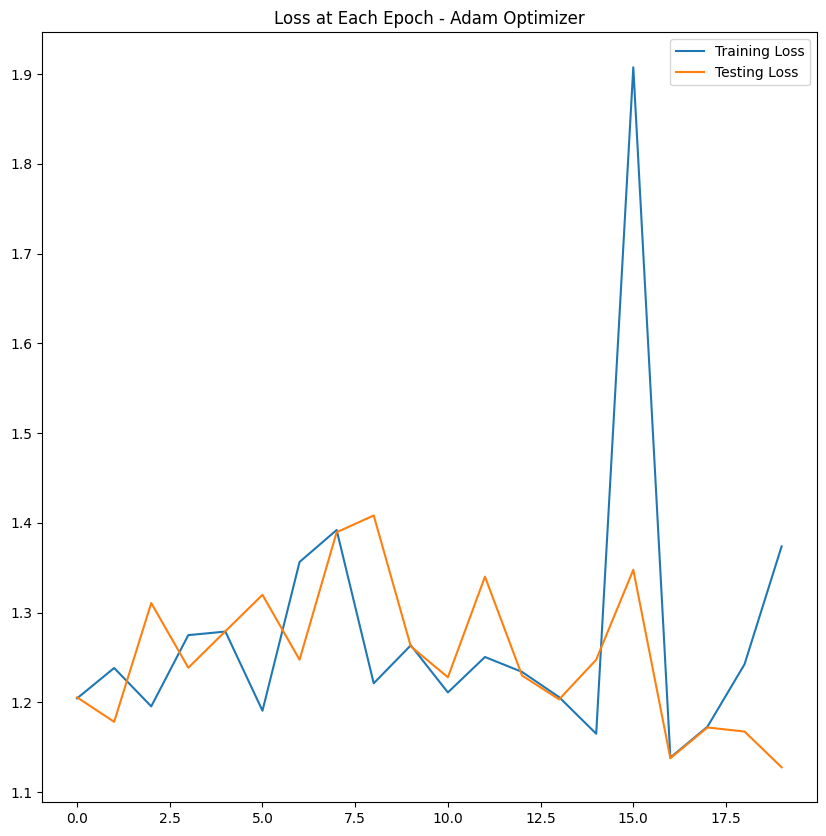

In [32]:
train_losses_cpu = [loss.cpu().detach().numpy() for loss in train_losses]
test_losses_cpu = [loss.cpu().detach().numpy() for loss in test_losses]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu, label="Training Loss")
plt.plot(test_losses_cpu, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 1 Adam.png")
plt.show()


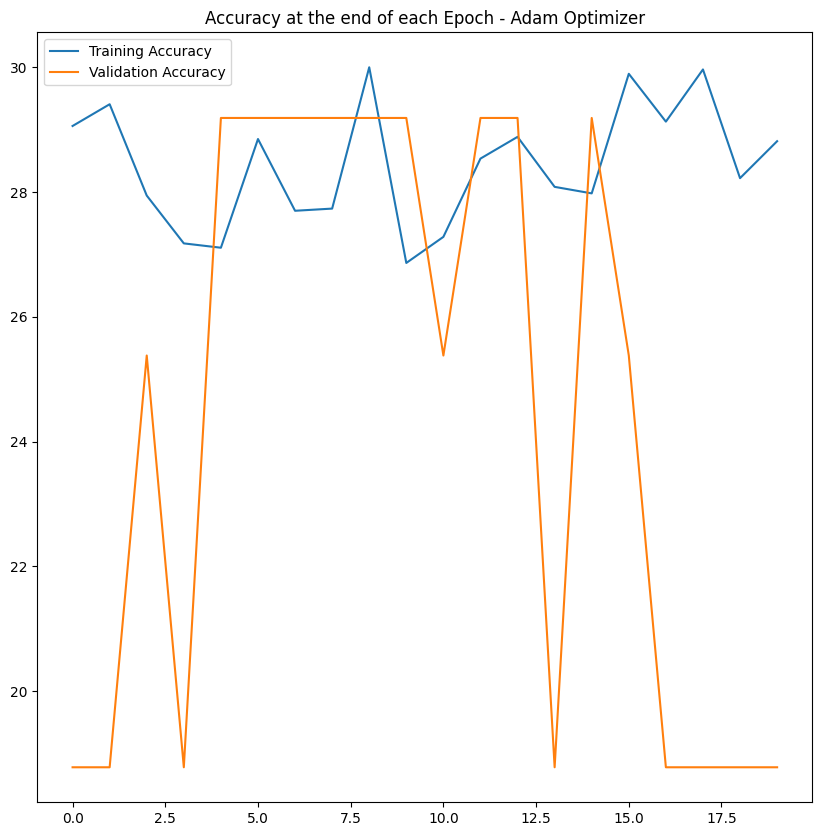

In [33]:
train_correct_cpu = [loss.cpu().detach().numpy() for loss in train_correct]
test_correct_cpu = [loss.cpu().detach().numpy() for loss in test_correct]

plt.figure(figsize=(10, 10))
plt.plot([(t/len(dataset))*100 for t in train_correct_cpu],label="Training Accuracy")
plt.plot([(t/len(test_dataset))*100 for t in test_correct_cpu],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 1 Adam.png")
plt.show()

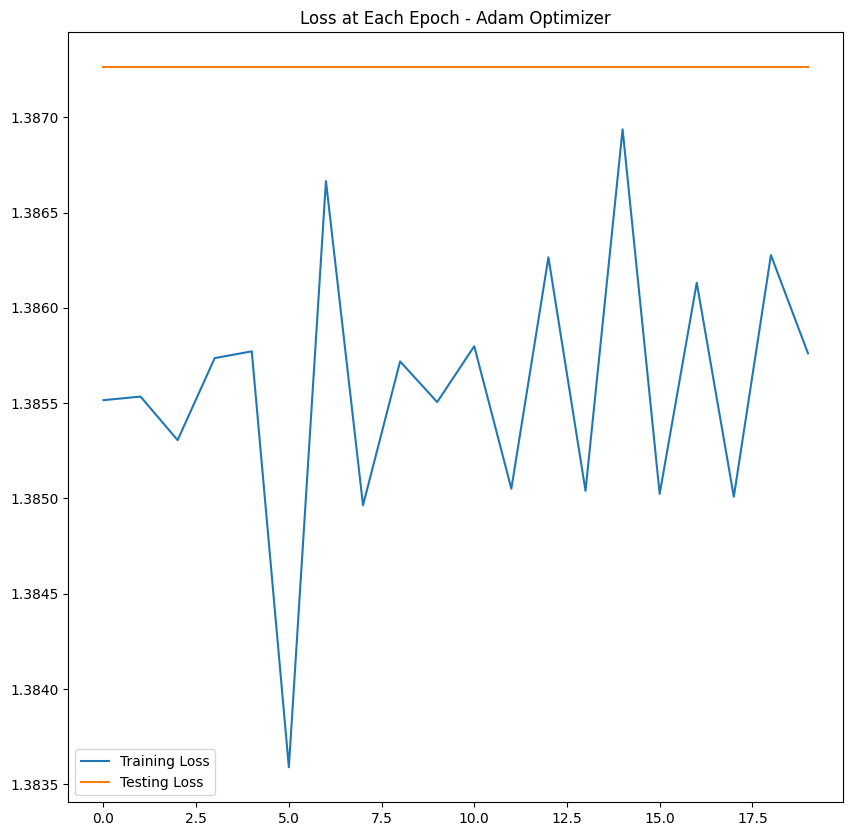

In [34]:
train_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in train_losses_32]
test_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in test_losses_32]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_32, label="Training Loss")
plt.plot(test_losses_cpu_32, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 32 Adam.png")
plt.show()



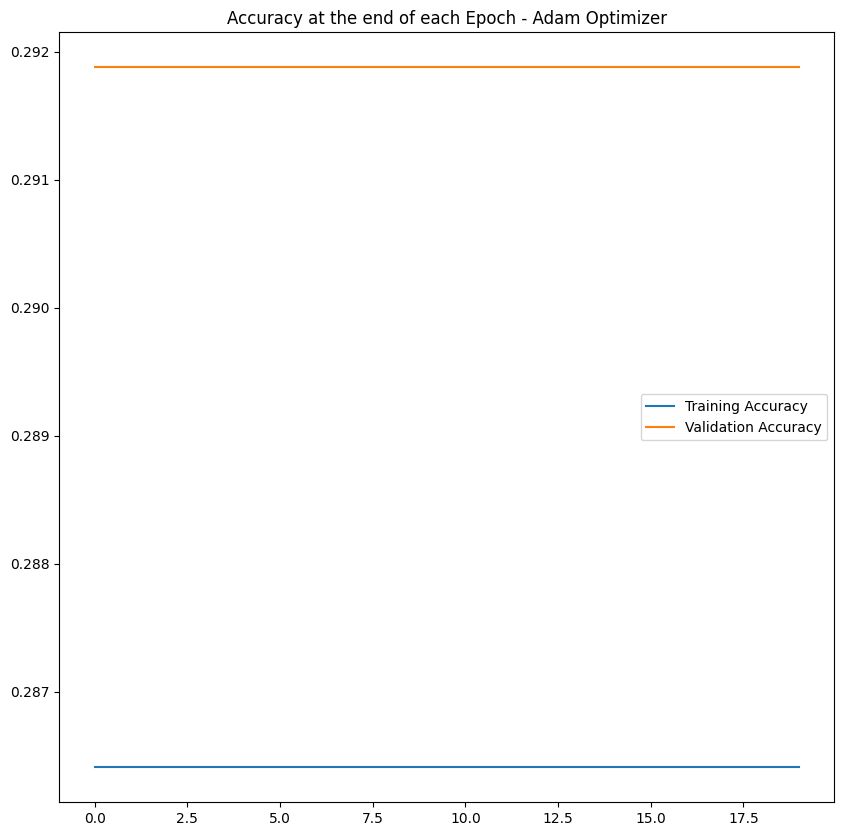

In [35]:
train_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in train_correct_32]
test_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in test_correct_32]

plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_32],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_32],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 32 Adam.png")
plt.show()

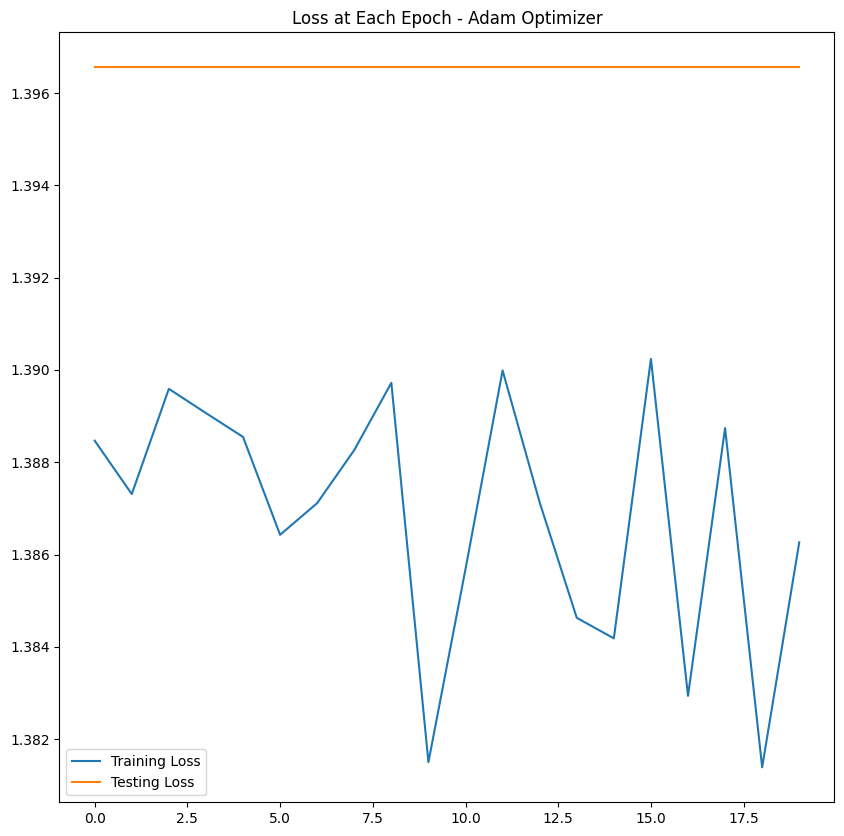

In [36]:
train_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in train_losses_64]
test_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in test_losses_64]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_64, label="Training Loss")
plt.plot(test_losses_cpu_64, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 64 Adam.png")
plt.show()

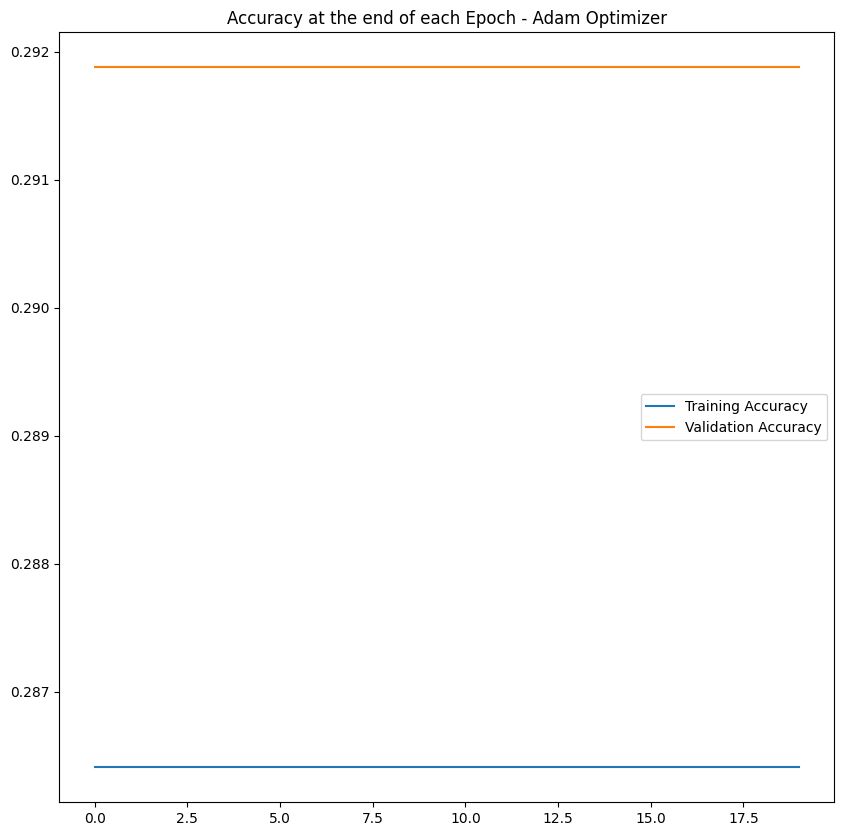

In [37]:
train_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in train_correct_64]
test_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in test_correct_64]

plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_64],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_64],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 64 Adam.png")
plt.show()

In [38]:
## Store the data
Adam_Losses=pd.DataFrame({'Training Loss-1':train_losses_cpu,'Testing Loss-1':test_losses_cpu,
                      'Training Loss-32':train_losses_cpu_32,'Testing Loss-32':test_losses_cpu_32,
                      'Training Loss-64':train_losses_cpu_64,'Testing Loss-64':test_losses_cpu_64})
Adam_Accuaracy=pd.DataFrame({'Training Loss-1':train_correct_cpu,'Testing Loss-1':test_correct_cpu,
                      'Training Loss-32':train_correct_cpu_32,'Testing Loss-32':test_correct_cpu_32,
                      'Training Loss-64':train_correct_cpu_64,'Testing Loss-64':test_correct_cpu_64})

In [39]:
Adam_Losses.to_csv('/content/drive/MyDrive/Dataset/Adam_Losses.csv')
Adam_Accuaracy.to_csv('/content/drive/MyDrive/Dataset/Adam_Accuaracy.csv')

# **Stochastic Gradient Descent**


## Batch Size = 1

In [40]:
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2,pin_memory=True)

In [41]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses.append(loss)
  train_correct.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.0793931484222412
Epoch: 2  Loss:1.1450049877166748
Epoch: 3  Loss:1.2016799449920654
Epoch: 4  Loss:1.5431478023529053
Epoch: 5  Loss:1.614440679550171
Epoch: 6  Loss:1.2326093912124634
Epoch: 7  Loss:1.3245400190353394
Epoch: 8  Loss:1.6719478368759155
Epoch: 9  Loss:1.4983456134796143
Epoch: 10  Loss:1.1906129121780396
Epoch: 11  Loss:1.3393590450286865
Epoch: 12  Loss:1.7002496719360352
Epoch: 13  Loss:1.712143898010254
Epoch: 14  Loss:1.3313666582107544
Epoch: 15  Loss:1.2323170900344849
Epoch: 16  Loss:1.2482935190200806
Epoch: 17  Loss:1.0671151876449585
Epoch: 18  Loss:2.323479652404785
Epoch: 19  Loss:1.146520733833313
Epoch: 20  Loss:1.1029354333877563
Total time taken to finish the training =13.36mins


## Batch Size = 32

In [42]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)

In [43]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_32=[]
test_losses_32=[]
train_correct_32=[]
test_correct_32=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_32.append(loss)
  train_correct_32.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_32.append(loss)
  test_correct_32.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.4753398895263672
Epoch: 2  Loss:1.3527544736862183
Epoch: 3  Loss:1.3480888605117798
Epoch: 4  Loss:1.2600544691085815
Epoch: 5  Loss:1.3033115863800049
Epoch: 6  Loss:1.2066560983657837
Epoch: 7  Loss:0.9397158026695251
Epoch: 8  Loss:1.2768752574920654
Epoch: 9  Loss:0.7562440633773804
Epoch: 10  Loss:0.7660408616065979
Epoch: 11  Loss:0.6122270226478577
Epoch: 12  Loss:0.5940569043159485
Epoch: 13  Loss:0.4138809144496918
Epoch: 14  Loss:0.18406471610069275
Epoch: 15  Loss:0.4904460906982422
Epoch: 16  Loss:0.1541420817375183
Epoch: 17  Loss:0.03886004537343979
Epoch: 18  Loss:0.1920493096113205
Epoch: 19  Loss:0.16733385622501373
Epoch: 20  Loss:0.02922222763299942
Total time taken to finish the training =6.93mins


## Batch Size = 64

In [44]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)

In [45]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=20
train_losses_64=[]
test_losses_64=[]
train_correct_64=[]
test_correct_64=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch: {i+1}  Loss:{loss.item()}")
  train_losses_64.append(loss)
  train_correct_64.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_64.append(loss)
  test_correct_64.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 1  Loss:1.2864747047424316
Epoch: 2  Loss:1.4109585285186768
Epoch: 3  Loss:1.3542671203613281
Epoch: 4  Loss:1.3045969009399414
Epoch: 5  Loss:1.1072601079940796
Epoch: 6  Loss:1.2065718173980713
Epoch: 7  Loss:0.6275694370269775
Epoch: 8  Loss:0.5421754121780396
Epoch: 9  Loss:0.2864115536212921
Epoch: 10  Loss:0.5091878771781921
Epoch: 11  Loss:0.47131964564323425
Epoch: 12  Loss:0.5195543766021729
Epoch: 13  Loss:0.3621540367603302
Epoch: 14  Loss:0.21241340041160583
Epoch: 15  Loss:0.16882510483264923
Epoch: 16  Loss:0.6070292592048645
Epoch: 17  Loss:0.2246013581752777
Epoch: 18  Loss:0.1393161416053772
Epoch: 19  Loss:0.006508051883429289
Epoch: 20  Loss:0.13100013136863708
Total time taken to finish the training =6.83mins


# Visualization

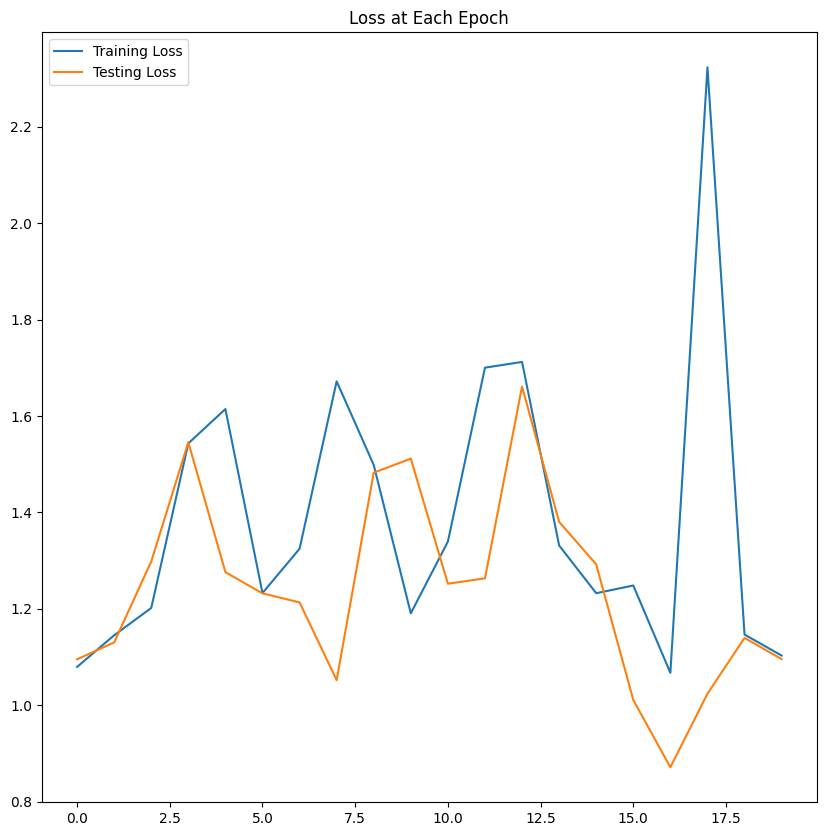

In [46]:
train_losses_cpu = [loss.cpu().detach().numpy() for loss in train_losses]
test_losses_cpu = [loss.cpu().detach().numpy() for loss in test_losses]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu, label="Training Loss")
plt.plot(test_losses_cpu, label="Testing Loss")
plt.title("Loss at Each Epoch")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 1 SGD.png")
plt.show()

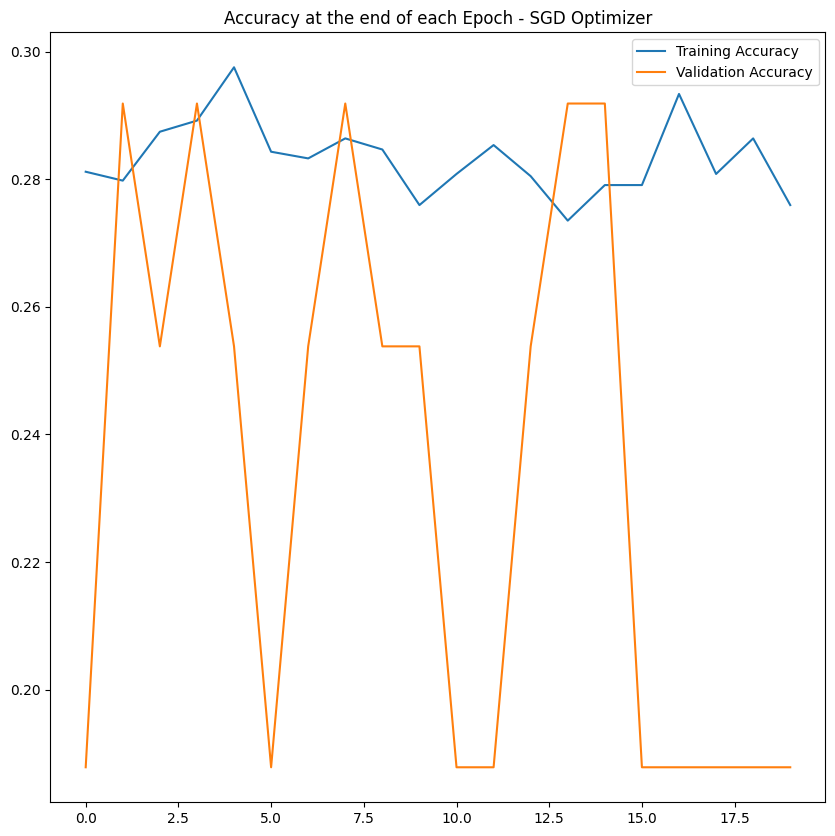

In [47]:
train_correct_cpu = [loss.cpu().detach().numpy() for loss in train_correct]
test_correct_cpu = [loss.cpu().detach().numpy() for loss in test_correct]

plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 1 SGD.png")
plt.show()

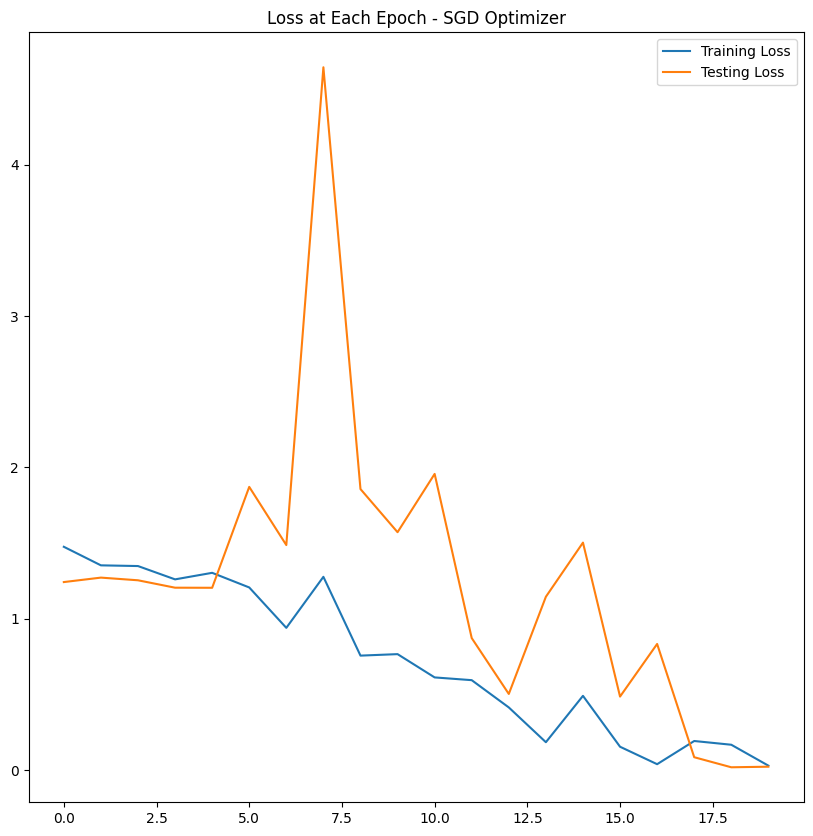

In [48]:
train_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in train_losses_32]
test_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in test_losses_32]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_32, label="Training Loss")
plt.plot(test_losses_cpu_32, label="Testing Loss")
plt.title("Loss at Each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 32 SGD.png")
plt.show()

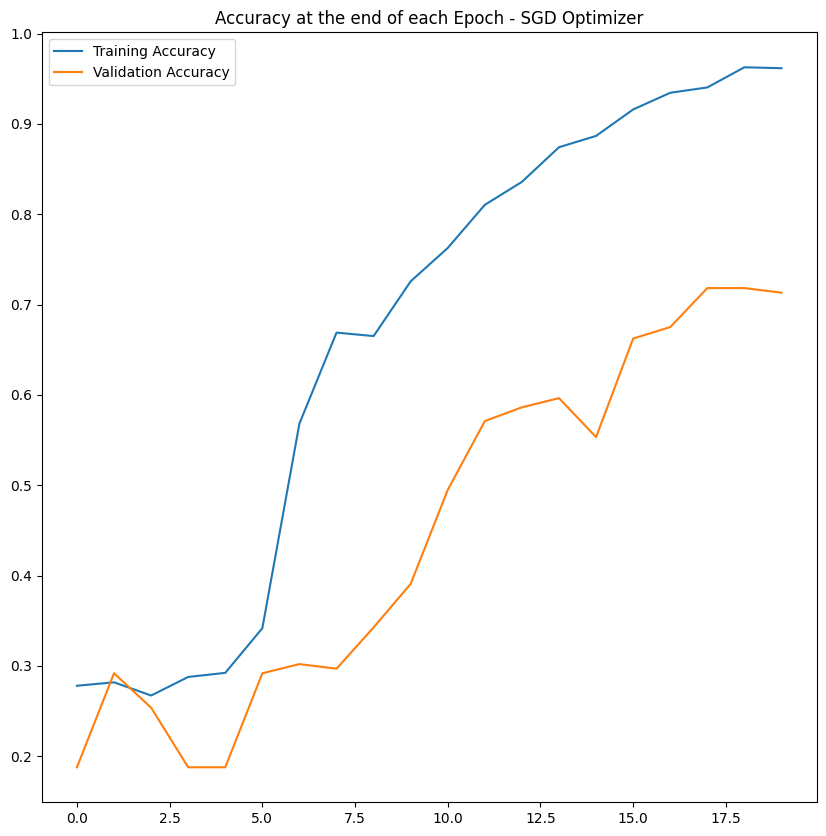

In [49]:
train_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in train_correct_32]
test_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in test_correct_32]

plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_32],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_32],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 32 SGD.png")
plt.show()

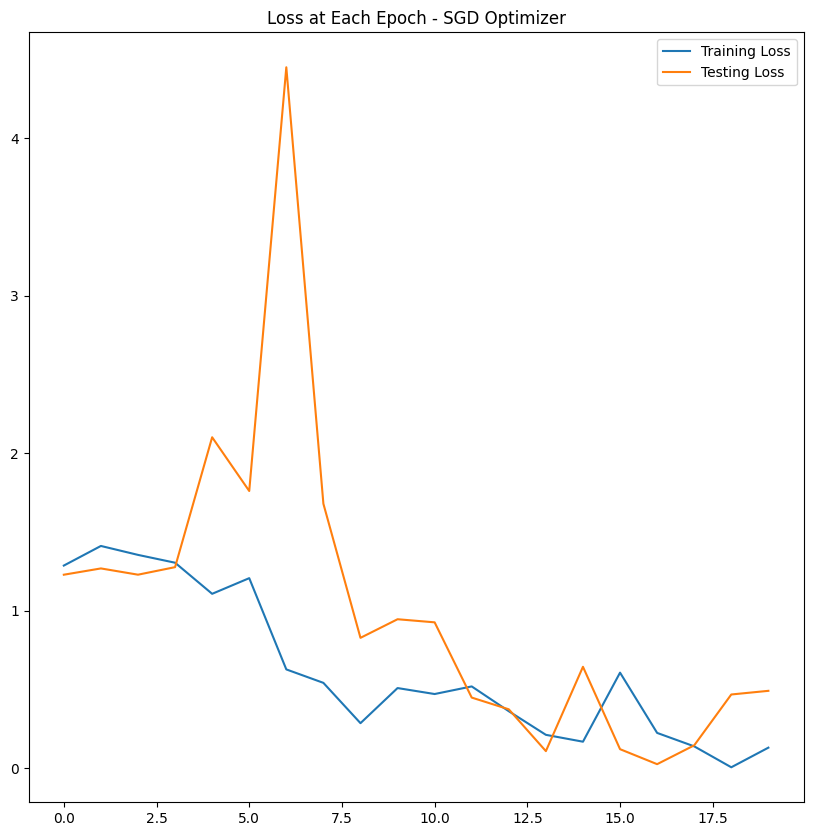

In [50]:
train_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in train_losses_64]
test_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in test_losses_64]

plt.figure(figsize=(10, 10))
plt.plot(train_losses_cpu_64, label="Training Loss")
plt.plot(test_losses_cpu_64, label="Testing Loss")
plt.title("Loss at Each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Loss Batch 64 SGD.png")
plt.show()

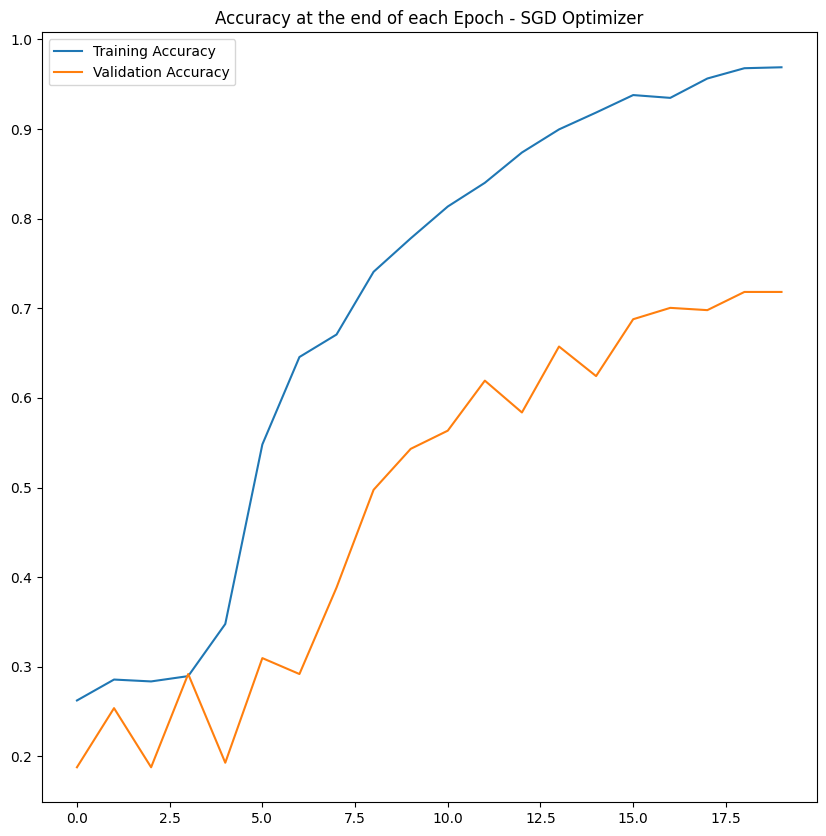

In [51]:
train_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in train_correct_64]
test_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in test_correct_64]

plt.figure(figsize=(10, 10))
plt.plot([t/len(dataset) for t in train_correct_cpu_64],label="Training Accuracy")
plt.plot([t/len(test_dataset) for t in test_correct_cpu_64],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()
plt.savefig("/content/drive/MyDrive/Dataset/Accuracy Batch 64 SGD.png")
plt.show()

## Storing the values


In [52]:
## Store the data
SGD_Losses=pd.DataFrame({'Training Loss-1':train_losses_cpu,'Testing Loss-1':test_losses_cpu,
                      'Training Loss-32':train_losses_cpu_32,'Testing Loss-32':test_losses_cpu_32,
                      'Training Loss-64':train_losses_cpu_64,'Testing Loss-64':test_losses_cpu_64})
SGD_Accuaracy=pd.DataFrame({'Training Loss-1':train_correct_cpu,'Testing Loss-1':test_correct_cpu,
                      'Training Loss-32':train_correct_cpu_32,'Testing Loss-32':test_correct_cpu_32,
                      'Training Loss-64':train_correct_cpu_64,'Testing Loss-64':test_correct_cpu_64})

In [53]:
SGD_Losses.to_csv('/content/drive/MyDrive/Dataset/SGD_Losses.csv')
SGD_Accuaracy.to_csv('/content/drive/MyDrive/Dataset/SGD_Accuaracy.csv')

In [ ]:
from google.colab import runtime
runtime.unassign()